In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [32]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [35]:
len(train_labels), len(test_labels)

(60000, 10000)

In [36]:
train_labels, test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

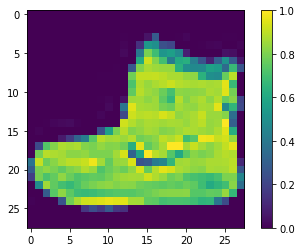

In [51]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [52]:
#scale feature values to btwn 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

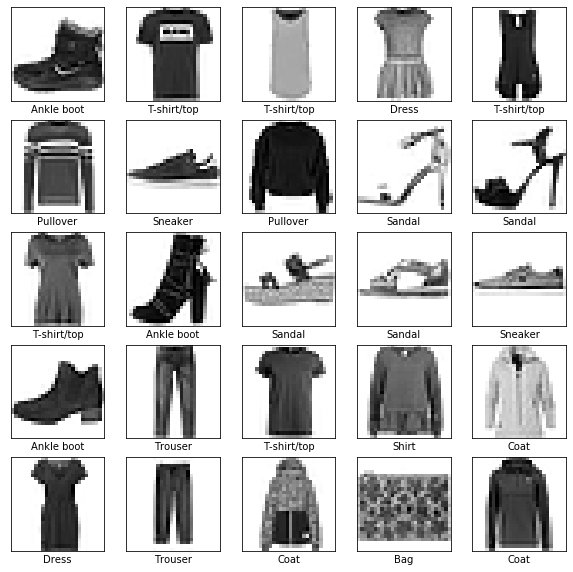

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [67]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4227 - accuracy: 0.8511
Epoch 2/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4161 - accuracy: 0.8536
Epoch 3/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4100 - accuracy: 0.8566
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4044 - accuracy: 0.8580
Epoch 5/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3990 - accuracy: 0.8599
Epoch 6/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3952 - accuracy: 0.8605
Epoch 7/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3902 - accuracy: 0.8625
Epoch 8/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3861 - accuracy: 0.8639
Epoch 9/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3826 - accuracy: 0.8648
Epoch 10/20
60

In [73]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3967 - accuracy: 0.8575

Test accuracy: 0.8575


In [74]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [75]:
predictions = probability_model.predict(test_images)

In [77]:
predictions[0]

array([2.6609231e-07, 2.3647091e-09, 3.1992181e-06, 8.8829756e-07,
       3.3887839e-06, 1.7682959e-01, 8.1734870e-06, 1.1537807e-01,
       6.2047397e-03, 7.0157170e-01], dtype=float32)

In [78]:
np.argmax(predictions[0])


9

In [79]:
test_labels[0]

9

In [102]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

[6.9001844e-06 9.9985051e-01 8.3978721e-06 1.0189417e-04 3.2159223e-05
 1.1785137e-12 1.4326122e-07 8.5892932e-10 1.6790201e-08 2.9169651e-09]


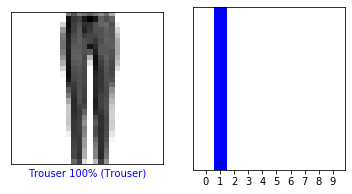

In [136]:
i = 345
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
print(predictions[i])
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

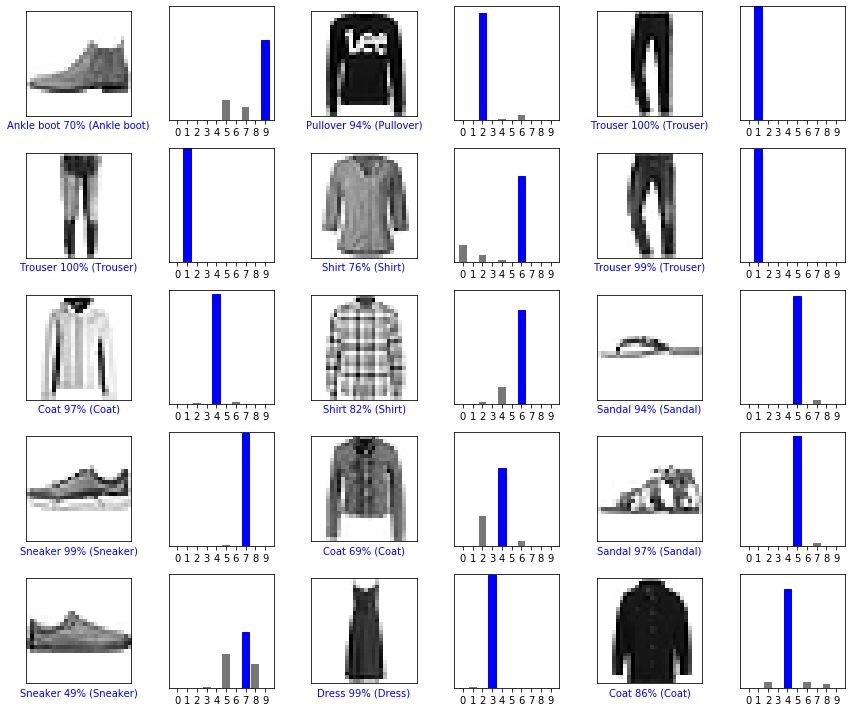

In [137]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [138]:
img = test_images[345]
print(img.shape)

(28, 28)


In [139]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)

(1, 28, 28)


In [140]:
print(predictions_single)

[[6.90020397e-06 9.99850512e-01 8.39788754e-06 1.01894366e-04
  3.21592561e-05 1.17851594e-12 1.43261900e-07 8.58932592e-10
  1.67902012e-08 2.91697067e-09]]


In [141]:
print(test_labels[345])
print(np.argmax(predictions_single))

1
1


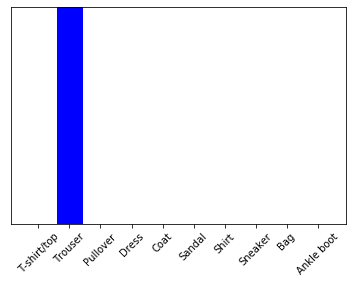

In [144]:
plot_value_array(345, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)